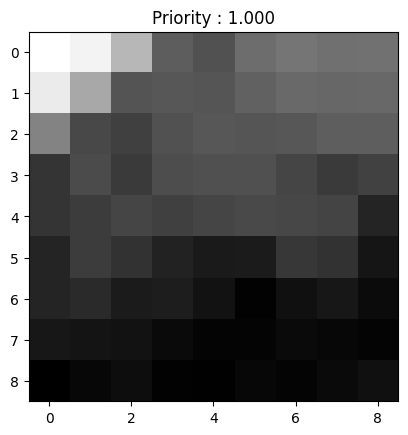

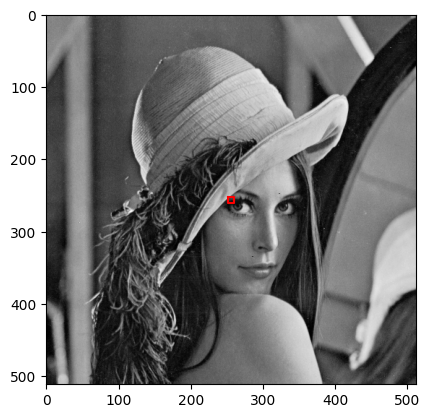

In [27]:
from patchedimage import PatchedImage

imgp = PatchedImage("images/lena.tif",4)

imgp.set_working_patch((256,256))

imgp.set_priorities()

imgp.show_patch()

imgp.show_patch_in_img()